In [2]:
from pathlib import Path

In [3]:
import torch
import torch.nn as nn

In [4]:
from torch.autograd import Variable

In [8]:
from models.ssd import SSD
from models.ssd.detector import Detector

In [9]:
MODEL_FILE = '/home/jiun/datasets/weights/cylinder/ssd-refine-annot/SSD300-049500.pth'

In [10]:
num_classes = 2
batch = 1

In [12]:
model = SSD.__new__(SSD, num_classes, batch)

In [13]:
model.load(torch.load(MODEL_FILE, map_location=lambda s, l: s))
model.eval()

In [14]:
Detector.init(num_classes, batch, nms=False)

In [30]:
inputs = torch.ones(1, 3, 300, 300)
output = model(inputs)

In [31]:
print(output.min(), output.max())
print(output.mean(), output.std())

tensor(-0.3757) tensor(1.5262)
tensor(0.5075) tensor(0.3512)


In [44]:
inputs = torch.FloatTensor(1, 3, 300, 300)
_ = model(inputs)

module = torch.jit.trace(model, inputs)
torch.jit.save(module, 'amano-script.pt')

In [33]:
import cv2
import numpy as np

In [34]:
from lib.augmentation import Base

In [106]:
img = image = cv2.imread('ground.jpg')
scale = torch.Tensor([image.shape[1], image.shape[0],
                      image.shape[1], image.shape[0]])

In [107]:
image, *_ = transform(image)
inputs = Variable(torch.from_numpy(image).permute(2, 0, 1).unsqueeze(0))

In [108]:
output, *_ = model(inputs)

In [109]:
print(inputs.min(), inputs.max())
print(inputs.mean(), inputs.std())

tensor(-123.) tensor(151.)
tensor(21.0846) tensor(40.7843)


In [110]:
print(output.min(), output.max())
print(output.mean(), output.std())

tensor(-18.3087) tensor(18.1685)
tensor(0.5087) tensor(0.4266)


In [111]:
confThresh = .3
nmsThresh = .3

In [112]:
boxes.shape

torch.Size([8732, 5])

In [113]:
detection = np.empty((0, 6), dtype=np.float32)
for klass, boxes in enumerate(output):
    if not klass:
        continue
        
    candidates = boxes[boxes[:, 0] >= confThresh]

    if candidates.size(0) == 0:
        continue

    candidates[:, 1:] *= scale

    detection = np.concatenate((
        detection,
        np.hstack((
            np.full((np.size(candidates, 0), 1), klass, dtype=np.uint8),
            candidates.cpu().detach().numpy(),
        )),
    ))

In [114]:
for klass, conf, x, y, w, h in detection:
    cv2.rectangle(img, (int(x), int(y)), (int(w), int(h)), (255, 0, 0), 3)

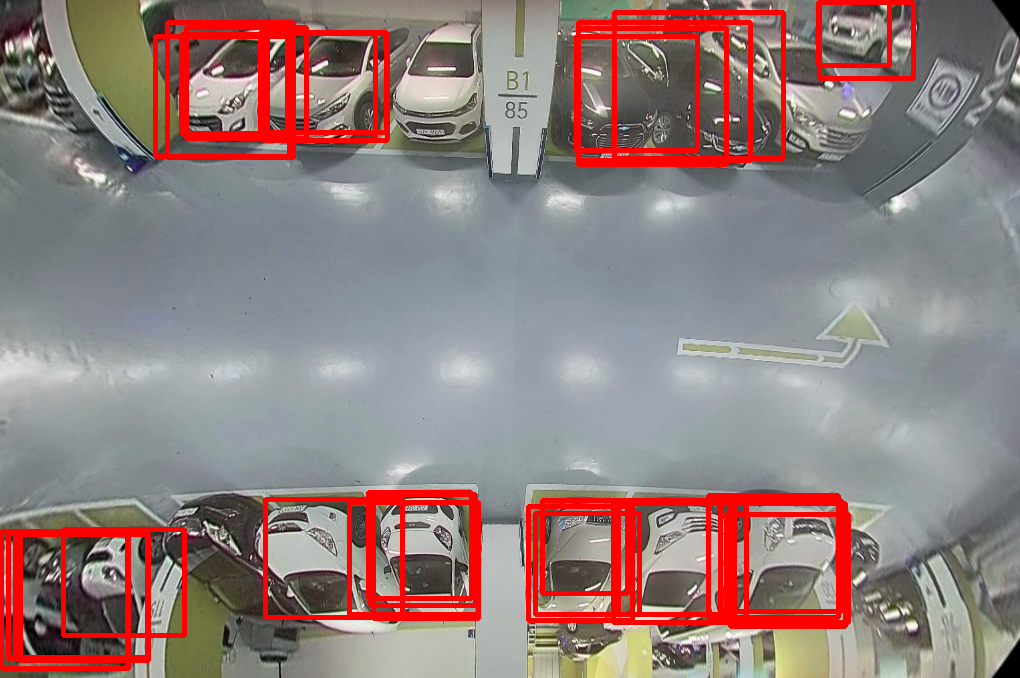

In [115]:
show(img)

In [45]:
transform = Base()

In [68]:
IMAGE_FILE = 'ground.jpg'

In [1]:
cp /home/jiun/datasets/amano/cylinder/refine-up-down/train/images/nvr001_10_CT_20190111015007+1.jpg tset.jpg

In [64]:
IMAGE_FILE = '/home/jiun/datasets/amano/cylinder/refine-up-down/train/images/nvr001_10_CT_20190111015007+1.jpg'

In [69]:
image = cv2.imread(IMAGE_FILE)

In [70]:
scale = torch.Tensor([image.shape[1], image.shape[0],
                      image.shape[1], image.shape[0]])

In [71]:
image, *_ = transform(image)

In [72]:
detections, *_ = model(Variable(torch.from_numpy(image).permute(2, 0, 1).unsqueeze(0)))

In [73]:
detection = np.empty((0, 6), dtype=np.float32)
for klass, boxes in enumerate(detections):
    candidates = boxes[boxes[:, 0] >= .3]

    if candidates.size(0) == 0:
        continue

    candidates[:, 1:] *= scale

    detection = np.concatenate((
        detection,
        np.hstack((
            np.full((np.size(candidates, 0), 1), klass, dtype=np.uint8),
            candidates.cpu().detach().numpy(),
        )),
    ))

In [74]:
image = cv2.imread(IMAGE_FILE)

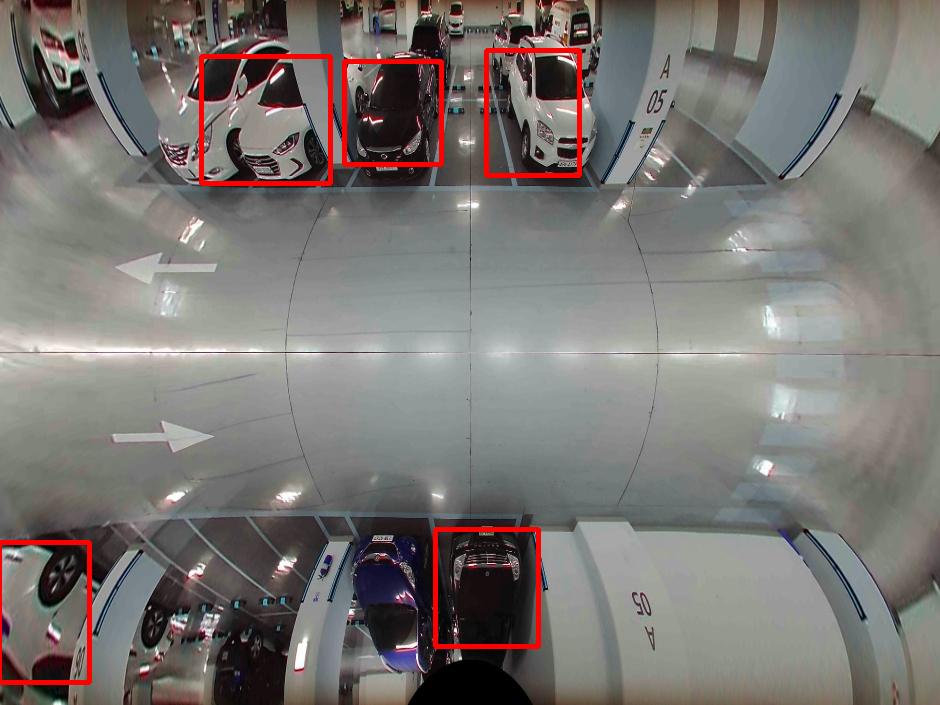

In [75]:
for *_, x, y, w, h in detection:
    cv2.rectangle(image, (int(x), int(y)), (int(w), int(h)), (255, 0, 0), 3)
show(image)

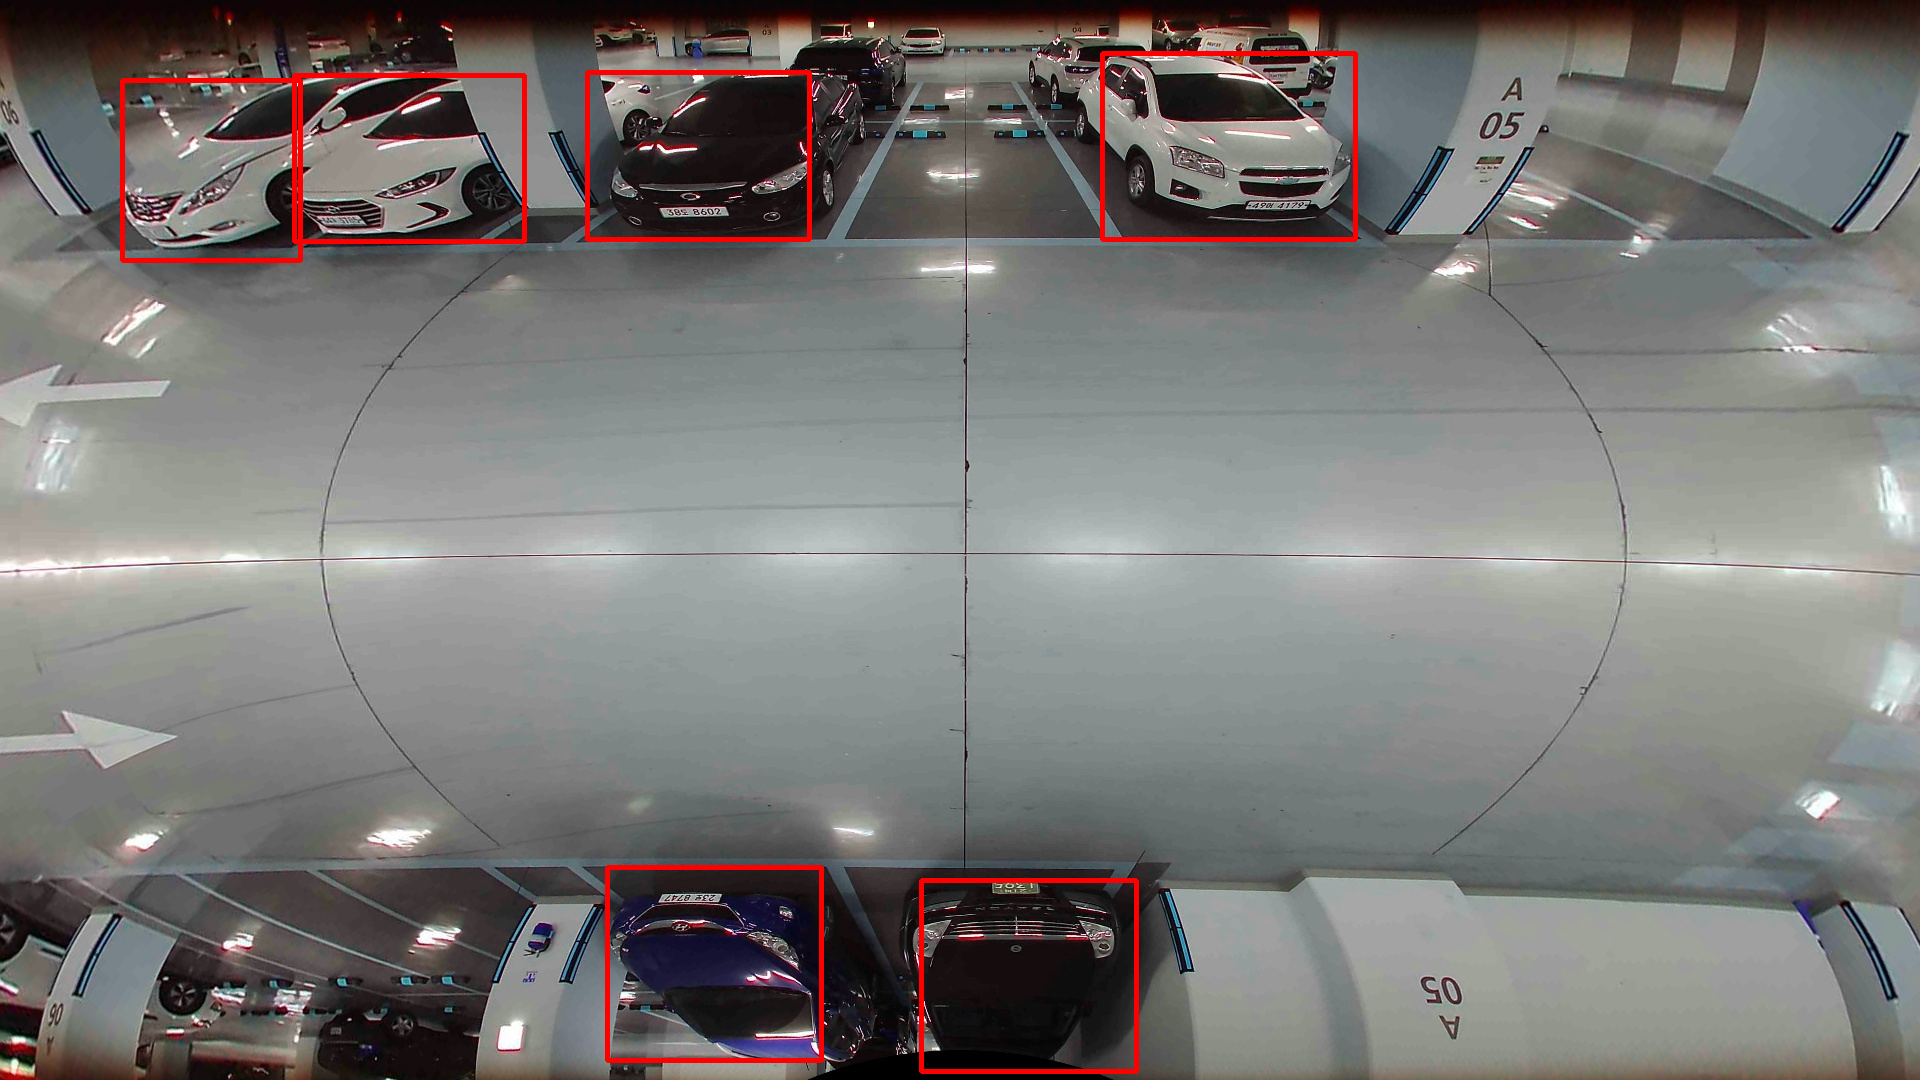

In [67]:
for *_, x, y, w, h in detection:
    cv2.rectangle(image, (int(x), int(y)), (int(w), int(h)), (255, 0, 0), 3)
show(image)

In [ ]:
show(img.astype(np.uint8))

In [84]:
from PIL import Image
from IPython.display import display

def show(ary):
    display(Image.fromarray(ary))